# install dependancies, takes around 45 seconds

Rendering Dependancies



In [2]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
#!pip install gym pyvirtualdisplay 2>&1
#!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

Pacman Dependancies

# Imports and Helper functions


In [32]:
import sys, os, copy
from pathlib import Path
from a2c.a2c import *
#from torch.distributions import Categorical
proj_folder = Path('.').absolute()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
action_dist = Categorical(NeuralNet(nS, nA, activation=nn.Softmax(dim=1))(torch.randn((1,4))))
#
action = action_dist.sample()
action_logprob = action_dist.log_prob(action)
print(action, action_logprob)

tensor([0]) tensor([-0.5790], grad_fn=<SqueezeBackward1>)


# Run Simulations!

In [88]:
import argparse, matplotlib.pyplot as plt, tqdm
def parse_a2c_arguments():
    # Command-line flags are defined here.
    parser = argparse.ArgumentParser()
    parser.add_argument('--env-name', dest='env_name', type=str,
                        default='CartPole-v0', help="Name of the environment to be run.")   # 'LunarLander-v2'
    parser.add_argument('--num-episodes', dest='num_episodes', type=int,
                        default=3500, help="Number of episodes to train on.")    # 3500
    parser.add_argument('--lr', dest='lr', type=float,
                        default=5e-4, help="The actor's learning rate.")
    parser.add_argument('--use_a2c', dest='use_a2c', type=bool,
                        default=False, help="Use A2C")
    parser.add_argument('--use_baseline', dest='use_baseline', type=bool,
                        default=False, help="Use baseline model")
    parser.add_argument('--baseline-lr', dest='baseline_lr', type=float,
                        default=5e-4, help="The actor's learning rate.")
    parser.add_argument('--critic-lr', dest='critic_lr', type=float,
                        default=1e-4, help="The critic's learning rate.")
    parser.add_argument('--n', dest='n', type=int,
                        default=100, help="The value of N in N-step A2C.")

    parser_group = parser.add_mutually_exclusive_group(required=False)
    parser_group.add_argument('--render', dest='render',
                              action='store_true',
                              help="Whether to render the environment.")
    parser_group.add_argument('--no-render', dest='render',
                              action='store_false',
                              help="Whether to render the environment.")
    parser.set_defaults(render=False)

    return parser.parse_known_args()[0]    #.parse_args()
args = parse_a2c_arguments()
DEBUG=False

In [ ]:
history, res = main_a2c(args)

Configurations:Namespace(baseline_lr=0.0005, critic_lr=0.0001, env_name='CartPole-v0', lr=0.0005, n=100, num_episodes=3500, render=False, use_a2c=False, use_baseline=True)


  0%|                                                  | 0/5 [00:00<?, ?it/s]

Seed:0
Episode: 0
Finished after 22 timesteps
[Policy Evaluation]
Finished after 11 timesteps
Finished after 17 timesteps
Finished after 19 timesteps
Finished after 15 timesteps
Finished after 28 timesteps
Finished after 17 timesteps
Finished after 12 timesteps
Finished after 14 timesteps
Finished after 19 timesteps
Finished after 12 timesteps
Finished after 11 timesteps
Finished after 12 timesteps
Finished after 19 timesteps
Finished after 16 timesteps
Finished after 9 timesteps
Finished after 18 timesteps
Finished after 53 timesteps
Finished after 18 timesteps
Finished after 19 timesteps
Finished after 11 timesteps
The test reward for episode 0 is 16.5 with sd of 9.195107394696377.
Episode: 1
Finished after 19 timesteps
Episode: 2
Finished after 12 timesteps
Episode: 3
Finished after 23 timesteps
Episode: 4
Finished after 27 timesteps
Episode: 5
Finished after 13 timesteps
Episode: 6
Finished after 17 timesteps
Episode: 7
Finished after 23 timesteps
Episode: 8
Finished after 37 times

 20%|████████▏                                | 1/5 [11:09<44:37, 669.47s/it]

Finished after 57 timesteps
Seed:1
Episode: 0
Finished after 19 timesteps
[Policy Evaluation]
Finished after 12 timesteps
Finished after 30 timesteps
Finished after 18 timesteps
Finished after 13 timesteps
Finished after 14 timesteps
Finished after 24 timesteps
Finished after 16 timesteps
Finished after 23 timesteps
Finished after 20 timesteps
Finished after 14 timesteps
Finished after 24 timesteps
Finished after 28 timesteps
Finished after 12 timesteps
Finished after 17 timesteps
Finished after 21 timesteps
Finished after 14 timesteps
Finished after 18 timesteps
Finished after 17 timesteps
Finished after 21 timesteps
Finished after 13 timesteps
The test reward for episode 0 is 17.45 with sd of 5.17179852662495.
Episode: 1
Finished after 21 timesteps
Episode: 2
Finished after 22 timesteps
Episode: 3
Finished after 22 timesteps
Episode: 4
Finished after 33 timesteps
Episode: 5
Finished after 13 timesteps
Episode: 6
Finished after 24 timesteps
Episode: 7
Finished after 11 timesteps
Episo

Text(0, 0.5, 'Return')

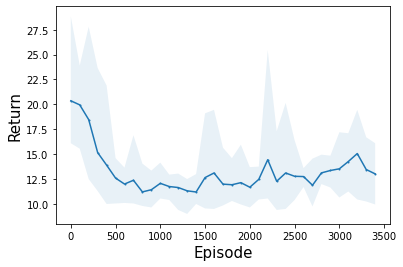

In [59]:
ks = np.arange(l)*100
avs = np.mean(res, axis=0)
maxs = np.max(res, axis=0)
mins = np.min(res, axis=0)

plt.fill_between(ks, mins, maxs, alpha=0.1)
plt.plot(ks, avs, '-o', markersize=1)

plt.xlabel('Episode', fontsize = 15)
plt.ylabel('Return', fontsize = 15)

In [ ]:
if not os.path.exists('./plots'):
    os.mkdir('./plots')

if A2C_net.type == 'A2C' or A2C_net.type == 2:
    plt.title("A2C Learning Curve for N = {}".format(args.n), fontsize = 24)
    plt.savefig("./plots/a2c_curve_N={}.png".format(args.n))
elif A2C_net.type == 'Baseline' or A2C_net.type == 1:
    plt.title("Baseline Reinforce Learning Curve".format(args.n), fontsize = 24)
    plt.savefig("./plots/Baseline_Reinforce_curve.png".format(args.n))
elif A2C_net.type == 'Reinforce' or A2C_net.type == 0: # Reinforce
    plt.title("Reinforce Learning Curve", fontsize = 24)
    plt.savefig("./plots/Reinforce_curve.png")use_baseline